<a href="https://colab.research.google.com/github/ClintJensen/DrawingsProject/blob/master/code/ConvNet/ConvNet_VGG_19_Drawings_fc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Feature extraction from VGG19 architecture layers with weights pre-trained on ImageNet

In [ ]:
# Here we use Keras API to process the data by using VGG19 
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd 


### When loading pretrained model output

In [ ]:
#Loading a pretrained model
#base_model = tf.keras.models.load_model("vgg19_trained.h5")

# The code below produces this error 
# OSError: SavedModel file does not exist at: vgg19_trained.h5/{saved_model.pbtxt|saved_model.pb}

### When loading ImageNet as a starting point

In [ ]:
# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

### If you have downloaded images into your Drive folder or want to save output in those folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#To save model locally run this:
#base_model.save("vgg19_trained.h5")

## Model Architecture with layer names

In [ ]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# When running Colab locally

In [ ]:
from google.colab import files

### Code to upload local image files to Colab

- After running the code below, navigate to the folder that holds all the images. Select all the images, and click on the 'open' button.

In [ ]:
# Code to upload local image files to Colab
uploaded = files.upload()

Saving DAMa025_T_DAPedit.png to DAMa025_T_DAPedit.png
Saving DAMa025_F_DAPedit.png to DAMa025_F_DAPedit.png
Saving DAMa024_T_DAPedit.png to DAMa024_T_DAPedit.png
Saving DAMa024_F_DAPedit.png to DAMa024_F_DAPedit.png
Saving DAMa023_T_DAPedit.png to DAMa023_T_DAPedit.png
Saving DAMa023_F_DAPedit.png to DAMa023_F_DAPedit.png
Saving DAMa022_T_DAPedit.png to DAMa022_T_DAPedit.png
Saving DAMa022_F_DAPedit.png to DAMa022_F_DAPedit.png
Saving DAMa021_T_DAPedit.png to DAMa021_T_DAPedit.png
Saving DAMa021_F_DAPedit.png to DAMa021_F_DAPedit.png
Saving DAMa020_T_DAPedit.png to DAMa020_T_DAPedit.png
Saving DAMa020_F_DAPedit.png to DAMa020_F_DAPedit.png
Saving DAMa019_T_DAPedit.png to DAMa019_T_DAPedit.png
Saving DAMa019_F_DAPedit.png to DAMa019_F_DAPedit.png
Saving DAMa018_T_DAPedit.png to DAMa018_T_DAPedit.png
Saving DAMa018_F_DAPedit.png to DAMa018_F_DAPedit.png
Saving DAMa017_T_DAPedit.png to DAMa017_T_DAPedit.png
Saving DAMa017_F_DAPedit.png to DAMa017_F_DAPedit.png
Saving DAMa016_T_DAPedit.png

# When running Colab via GitHub

In [ ]:
# Images are storage in GitHub, by running this we clone the data into Colab
# Run this just once per session

#! git clone https://github.com/ClintJensen/DrawingsProject

### To view files in GitHub folder

In [ ]:
# Now repo data is available in Colab local environment
#!ls DrawingsProject

In [ ]:
# You can run this if you want to check the path for a single image
# ! ls DrawingsProject/data/DAP_NEXT_Images/

# Load and reshape the image to be feed into the model

In [ ]:
# Load and reshape the image to be feed into the model

#Path using Tim's local network
#img_path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/DAM3D001_P_CUAedit.jpg'
#Path using Pablo's Github
#img_path = 'Drawings/data/humans_drawings/DAM001_F_DAPedit.jpg'
#Path using Clint Jensen's GitHub
#img_path = '../content/DrawingsProject/data/DAP_NEXT_Images/DAM001_F_DAPedit.png'

#path when you have loaded directly into Colab content folder
img_path = '../content/DAM001_F_DAPedit.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Selecting layer for feature extraction 

In [ ]:
# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "fc1"  # let's pick the 1st fully conected layer

# To check other layers
# feature_layer = "fc2 "
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

#### Setting up feature extraction across full model based on feature selected 

In [ ]:
# Do the feature extraction
fc1_features = model.predict(x)

In [ ]:
# In the graphic depiction above we can double check that shape of the feature space is correct
# Print tensor shape
print (fc1_features.shape)

(1, 4096)


In [ ]:
# Print extracted feature as a tensor (i.e., feature)
# print(fc1_features)

In [ ]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(fc1_features)
vgg19_feature_np.flatten()

array([0.       , 5.4498644, 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)

#### Output of number of filenames

In [ ]:
# Get the drawings filenames from directory 
from os import listdir
from os.path import isfile, join

# If relative path doesn't work, change path as nedeed
# path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/'
# path = '../content/DrawingsProject/data/DAP_NEXT_Images/'

path = '../content/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield the same number of images within the image file

308

## Feature extraction from all images based on specified layer

In [ ]:

# # First pick the layer for feature extraction
# # A list of the layers' names is obtained by running "base_model.summary()"
# feature_layer = "fc1" # let's pick the 1st fully conected layer
# model = Model(inputs=base_model.input, 
#               outputs=base_model.get_layer(feature_layer).output)

# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshape and preprocess the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extract the featues and flatten the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())
  

In [ ]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
type(vgg19_feature_list_np)
print(vgg19_feature_list_np.shape)

(308, 4096)


#### Exporting Files

In [ ]:
#And write it to a csv file
#To save within the base content file of Colab
#np.savetxt("vgg19_fc1_DAP_study1_3.csv", vgg19_feature_list_np, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc1_450_256/vgg19_fc1_DAP_study1_3.csv", vgg19_feature_list_np, delimiter=",")


In [ ]:
#And write filenames to a csv file
df = pd.DataFrame(filenames)

#To save within the base content file of Colab
df.to_csv("filenames_vgg19_fc1_DAP.csv")

#To save within a specific drive file update this path
df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc1_450_256/filenames_vgg19_fc1_DAP.csv")

# Hierarchical clustering on drawings with vectors extracted from VGG19

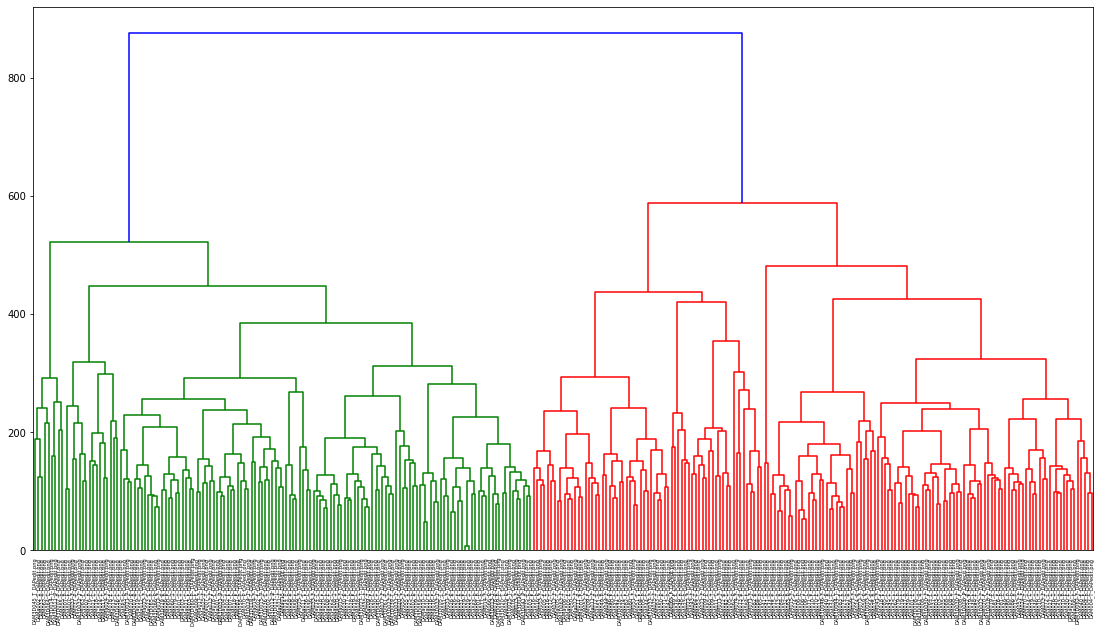

In [42]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [43]:
# Based on the dendogram, if we use ~300 as a cutoff we have 14 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 14
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=14)

In [44]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[ 2  0  6  3  4  4 12 12  4  5  3  6  3 13 11  0  5 11 13 11 13  3 11  3
  8  3  3 13 13 11  7  7 13  6  5  7  6 10  1  6  7  7  5  7  2  4 13  5
  6  4  7  4  4 13 13 10  1 11  3  7  2 11 11  7  6  8 11  2  7  7  4  5
  5  6  4  3  3  3  4  6  1  9  7 13  7  6 10  4  6  4 10 10 13  4 13  7
  6  3  6 11 11  5  7  4 13  4  4  3  6  5 11  4 13 11  7 12  5  6  3  7
  3  1 11  8  4 10  7 12 13  4  7 11  4  7  4  6  7 13  4  7 13  6  6  6
  9  6 11  6  4 11  3  4  3 11 13 11  0 13  7  4  5  4 11 12 11 13  5  6
  4  5 12  3  4  4  6  4  7  4  1  4  5 13  2  3  4  8  3  8  4  3  4  0
 11  2  6  3 12  0 11 13  1  1  0  6 11 10 11  4  5  4  6  4 11  3  7  7
  5 11  5  3  2  4 11 13  0  6  5  4  3 13  5  3  4  5  1 11  3  6  6  7
  5  4  6  8  4  0 11  7  5  1 11  6 13 11  3 13  4  3  4  4  5  4  4  4
 13 13 13  6  5  6  4  6 10  6  5  2  7 11  4  6  0  7  6 11  3  6  3 10
  6 10 11 10  4  4 13 11  5  4 13  4  3  3  7 11  6  4  2 10]


#### Exporting Files

In [45]:
#And write it to a csv file

#To save within the base content file of Colab
#np.savetxt("hclustering.clusterValues_f1.csv", hclustering.labels_, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc1_450_256/hclustering.clusterValues_f1.csv", hclustering.labels_, delimiter=",")

In [46]:
#To save within the base content file of Colab
#pd.DataFrame(labelList).to_csv("hclustering.imageLabels_f1.csv", header=None, index=None)

#To save within a specific drive file update this path
pd.DataFrame(labelList).to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc1_450_256/hclustering.imageLabels_f1.csv", header=None, index=None)

## Plotting drawings by cluster

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd

In [48]:
# First, let's create a 2D pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (308, 2)
             filenames_np  clusters_np
0    DAM021_T_DAPedit.png            2
1    DAM084_T_DAPedit.png            0
2    DAM071_T_DAPedit.png            6
3  DAM3D059_T_DAPedit.png            3
4   DAMa021_F_DAPedit.png            4


In [49]:
drawings_df

,filenames_np,clusters_np
0,DAM021_T_DAPedit.png,2
1,DAM084_T_DAPedit.png,0
2,DAM071_T_DAPedit.png,6
3,DAM3D059_T_DAPedit.png,3
4,DAMa021_F_DAPedit.png,4
...,...,...
303,DAM037_T_DAPedit.png,11
304,DAM047_T_DAPedit.png,6
305,DAM3D060_P _DAPedit.png,4
306,DAMa024_F_DAPedit.png,2


In [50]:
#And write it to a csv file
drawings_df = pd.DataFrame(drawings_df)

#pd.DataFrame(labelList).to_csv("drawings_df.csv", header=None, index=None)

#To save within the base content file of Colab
drawings_df.to_csv("drawings_df_fc1_14clust.csv", index=None)

#To save within a specific drive file update this path
drawings_df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc1_450_256/drawings_df_fc1_14clust.csv", index=None)

### Subsetting for Cluster Groups


In [51]:
# Let's subset the dataframe into 11 dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster

cluster_1 = subCluster(0)
print("Length cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Length cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Length cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Length cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Length cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Length cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Length cluster 7: ", len(cluster_7))
print(cluster_7.head())

cluster_8 = subCluster(7)
print("Length cluster 8: ", len(cluster_8))
print(cluster_8.head())

cluster_9 = subCluster(8)
print("Length cluster 8: ", len(cluster_9))
print(cluster_9.head())

cluster_10 = subCluster(9)
print("Length cluster 10: ", len(cluster_10))
print(cluster_10.head())

cluster_11 = subCluster(10)
print("Length cluster 11: ", len(cluster_11))
print(cluster_11.head())

cluster_12 = subCluster(11)
print("Length cluster 12: ", len(cluster_12))
print(cluster_12.head())

cluster_13 = subCluster(12)
print("Length cluster 13: ", len(cluster_13))
print(cluster_13.head())

cluster_14 = subCluster(13)
print("Length cluster 14: ", len(cluster_14))
print(cluster_14.head())

Length cluster 1:  9
             filenames_np  clusters_np
1    DAM084_T_DAPedit.png            0
15   DAM084_F_DAPedit.png            0
156  DAM071_F_DAPedit.png            0
191  DAM062_P_DAPedit.png            0
197  DAM065_P_DAPedit.png            0
Length cluster 2:  9
               filenames_np  clusters_np
38     DAM062_T_DAPedit.png            1
56   DAM3D045_T_DAPedit.png            1
80   DAM3D002_P_DAPedit.png            1
121   DAMa002_T_DAPedit.png            1
178  DAM3D014_T_DAPedit.png            1
Length cluster 3:  9
               filenames_np  clusters_np
0      DAM021_T_DAPedit.png            2
44    DAMa017_T_DAPedit.png            2
60    DAMa013_T_DAPedit.png            2
67     DAM076_P_DAPedit.png            2
182  DAM3D056_T_DAPedit.png            2
Length cluster 4:  33
              filenames_np  clusters_np
3   DAM3D059_T_DAPedit.png            3
10   DAMa010_T_DAPedit.png            3
12  DAM3D020_T_DAPedit.png            3
21    DAM033_T_DAPedit.png   

In [52]:
# Let's check cluster size to get a better idea of how to 
# layout the grid for plotting

print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))
print(len(cluster_4))
print(len(cluster_5))
print(len(cluster_6))
print(len(cluster_7))
print(len(cluster_8))
print(len(cluster_9))
print(len(cluster_10))
print(len(cluster_11))
print(len(cluster_12))
print(len(cluster_13))
print(len(cluster_14))

9
9
9
33
56
26
40
31
6
2
12
37
7
31


## Function based approach to save plots for each cluster

In [53]:

#########################################
# Function to save plots for each cluster
#########################################


def plotClusters(cluster, nrows, ncols, save_path, cluster_name):
    '''Plot images for a clusterin a grid.
     
     Arguments:
     cluster      -- cluster dtaframe name
     nrows        -- number of rows in the plot
     ncols        -- number of cols in the plot
     save_path    -- string path name to save plot
     cluster_name -- string name to save plot 
    '''
    assert isinstance(cluster, pd.DataFrame), "cluster is not pandas dataframe"
    assert isinstance(nrows, int)
    assert isinstance(ncols, int)
    assert isinstance(save_path, str)
    assert isinstance(cluster_name, str)
    
    # Image parameters
    width = 10
    height = 10
    fig=plt.figure(figsize=(18, 18)) 
    
    # We need to create a counter to loop over images and allocate 
    # the image in the right position in the grid
    pic_index = 0 
    
    # Loop over each pic and plot it in the the grid
    # .iterrows() is a method that works with pandas dataframes
    for index, row in (cluster.iterrows()): 
      pic_index += 1
      # Create grid to plot images
      fig.add_subplot(nrows, ncols, pic_index)
      img_path = path + row['filenames_np']
      img=mpimg.imread(img_path)
      imgplot = plt.imshow(img)
      # get rid off axis and grid within each pic
      plt.axis('off')
    save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc1_14clust_450_256/'
    
    
    plt.savefig(save_path+cluster_name+'.png', bbox_inches='tight')
    plt.show()

### Plot Cluster 1

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_1))

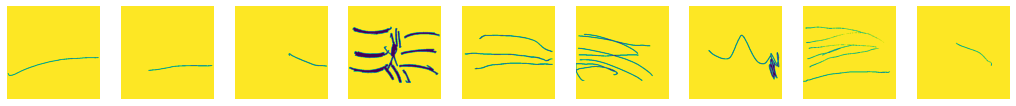

In [54]:
################################
# Plot cluster 1 Function approach
################################

# pick the cluster to plot
cluster = cluster_1

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_1'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [55]:
# # pick the cluster to plot
# cluster = cluster_1

# # Define grid shape parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 



# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')
# #plt.savefig('cluster_1_fc1_drawings_DAP.png', dpi=200)
# plt.show()


### Plot Cluster 2

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_2))

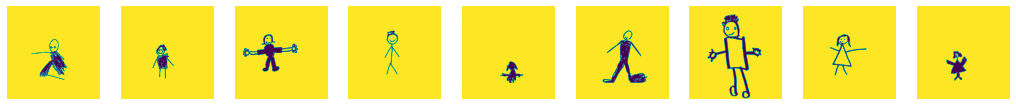

In [56]:
################################
# Plot cluster 2 Function approach
################################

# pick the cluster to plot
cluster = cluster_2

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_2'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [79]:
# # # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 2

# #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_2

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)

#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_2_fc1_drawings_DAP.png', dpi=200)
# plt.show()


### Plot Cluster 3

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_3))

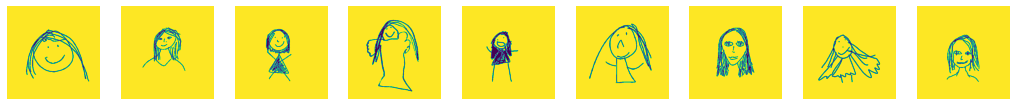

In [58]:
################################
# Plot cluster 3 Function approach
################################

# pick the cluster to plot
cluster = cluster_3

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_3'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [59]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 3

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_3

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_3_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 4

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_4))

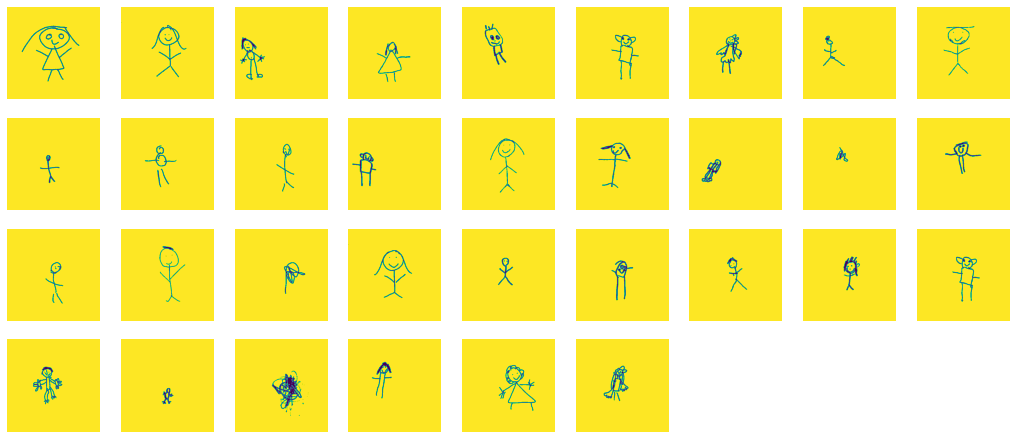

In [60]:
################################
# Plot cluster 4 Function approach
################################

# pick the cluster to plot
cluster = cluster_4

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_4'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [61]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 4

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_4

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)

#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_4_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 5

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_5))

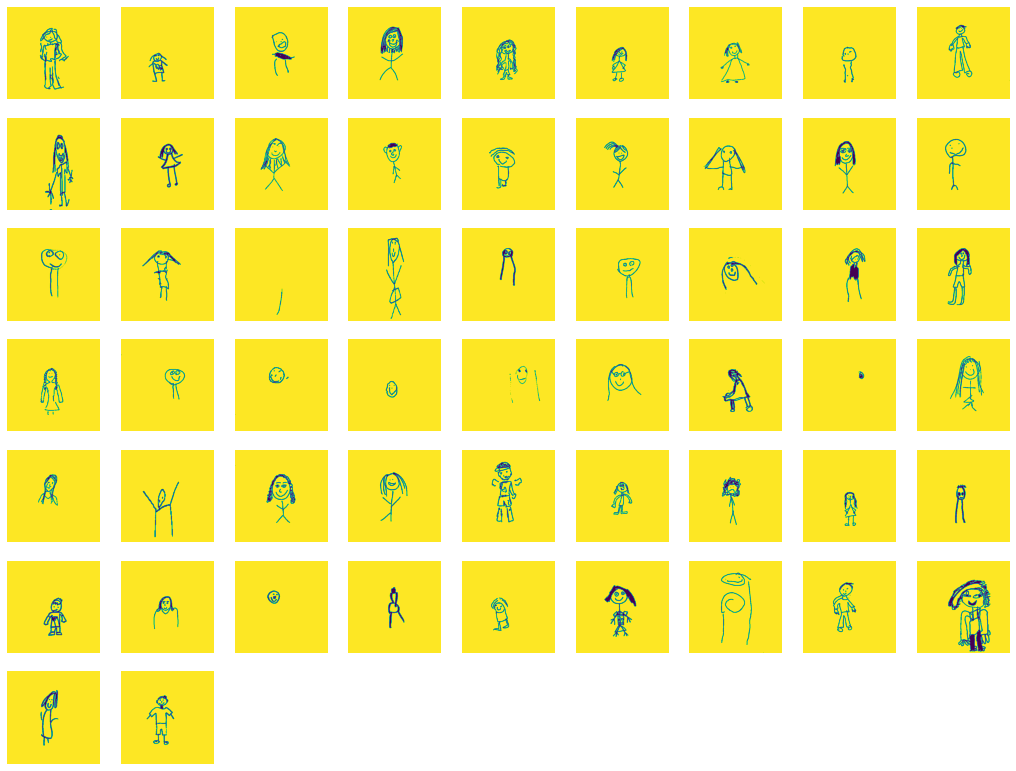

In [62]:
################################
# Plot cluster 5 Function approach
################################

# pick the cluster to plot
cluster = cluster_5

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_5'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [63]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 5

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_5

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_5_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 6

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_6))

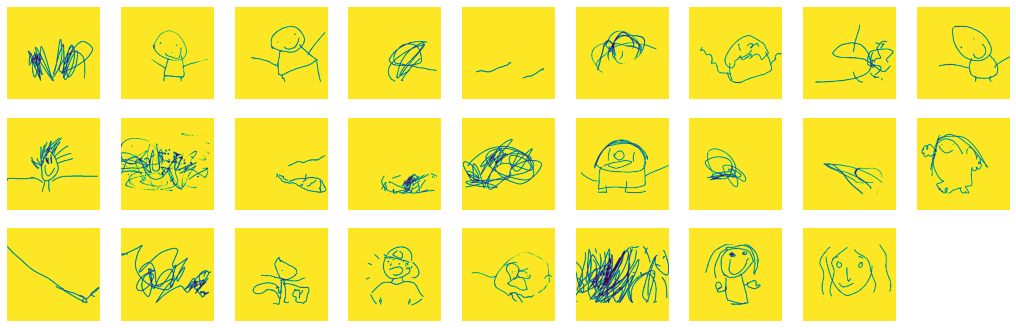

In [64]:
################################
# Plot cluster 6 Function approach
################################

# pick the cluster to plot
cluster = cluster_6

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_6'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [65]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 6

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_6

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_6_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 7

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_7))

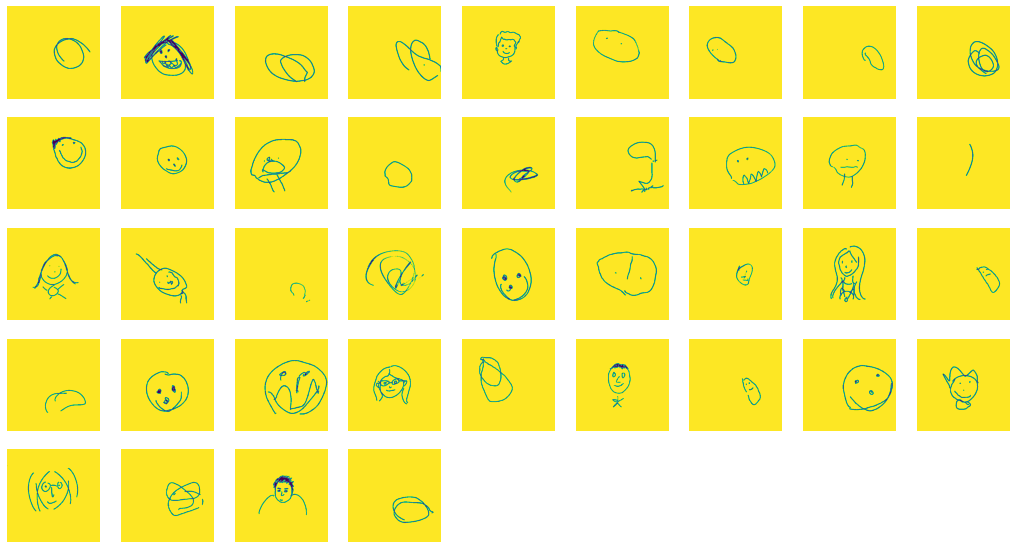

In [66]:
################################
# Plot cluster 7 Function approach
################################

# pick the cluster to plot
cluster = cluster_7

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_7'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [67]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 7

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_7

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_7_fc1_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 8

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_8))

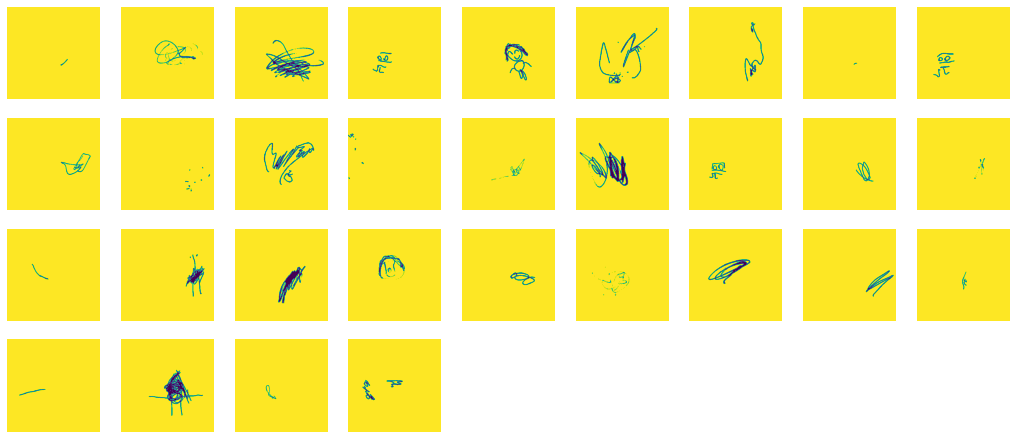

In [68]:
################################
# Plot cluster 8 Function approach
################################

# pick the cluster to plot
cluster = cluster_8

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_8'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 8

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_8

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_8_fc1_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 9

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_9))

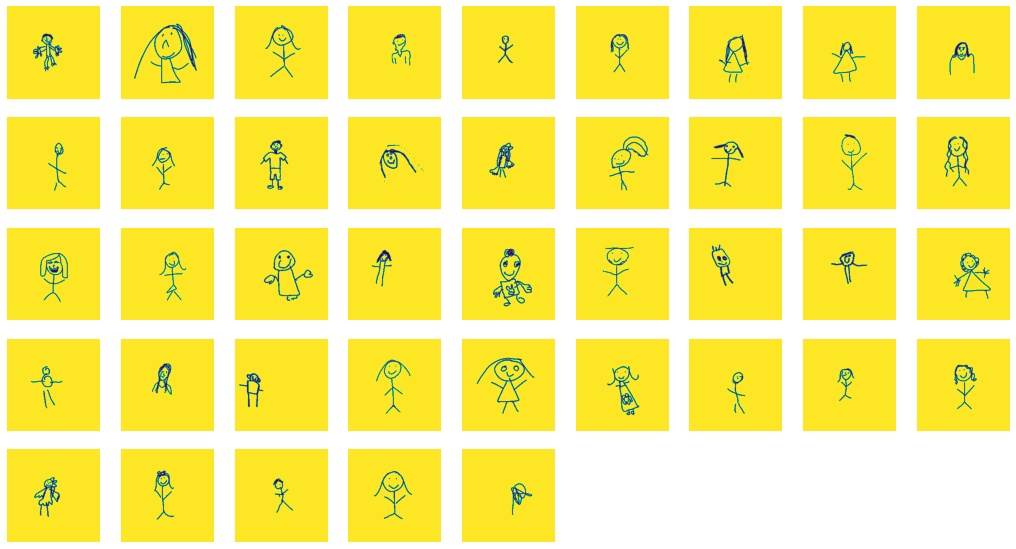

In [ ]:
################################
# Plot cluster 9 Function approach
################################

# pick the cluster to plot
cluster = cluster_9

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_9'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 9

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_9

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_9_fc1_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 10

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_10))

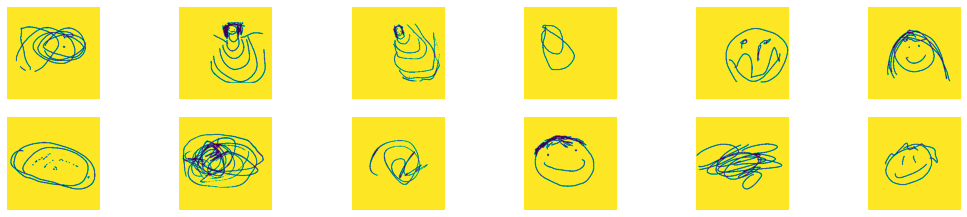

In [ ]:
################################
# Plot cluster 10 Function approach
################################

# pick the cluster to plot
cluster = cluster_10

# Define grid shape
nrows = 9
ncols = 6

cluster_name = 'cluster_10'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 10

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_10

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_10_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 11

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_11))

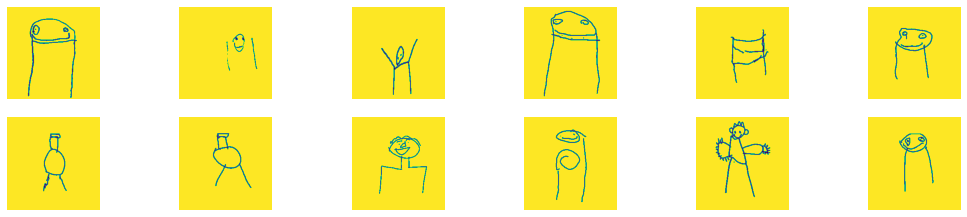

In [ ]:
################################
# Plot cluster 11 Function approach
################################

# pick the cluster to plot
cluster = cluster_11

# Define grid shape
nrows = 9
ncols = 6

cluster_name = 'cluster_11'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_11_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 12

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_12))

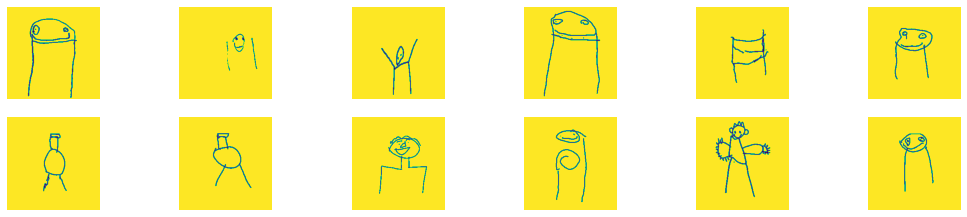

In [ ]:
################################
# Plot cluster 12 Function approach
################################

# pick the cluster to plot
cluster = cluster_12

# Define grid shape
nrows = 9
ncols = 6

cluster_name = 'cluster_12'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 12

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_12

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_12_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 13

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_13))

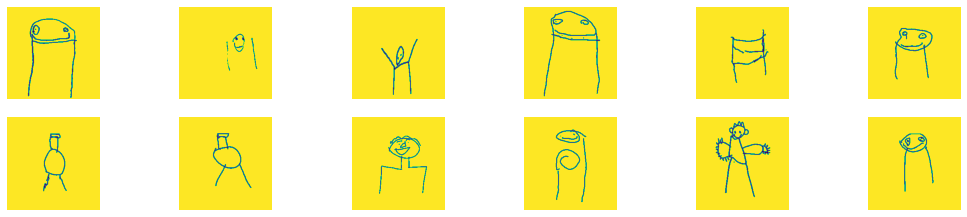

In [ ]:
################################
# Plot cluster 13 Function approach
################################

# pick the cluster to plot
cluster = cluster_13

# Define grid shape
nrows = 9
ncols = 6

cluster_name = 'cluster_13'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 13

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_13

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_13_fc1_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 14

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_14))

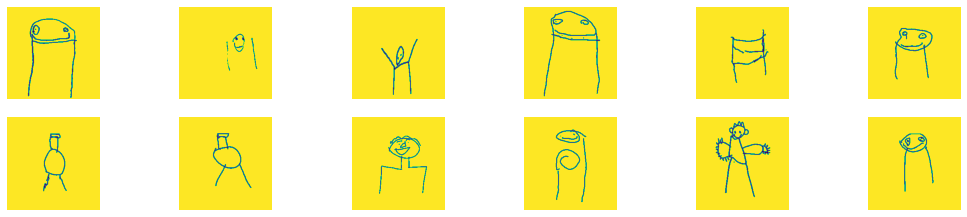

In [ ]:
################################
# Plot cluster 14 Function approach
################################

# pick the cluster to plot
cluster = cluster_14

# Define grid shape
nrows = 9
ncols = 6

cluster_name = 'cluster_14'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 14

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_14

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_14_fc1_drawings_DAP.png', dpi=200)
# plt.show()